# Data Analysis

In [1]:
# Handling Datasets Libraries
import numpy as np
import pandas as pd

# Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Yeo-Johnson Transformation
import scipy.stats as stats

In [2]:
# Display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Load dataset
data = pd.read_csv('../train.csv')

# Rows and Columns of the data
print(data.shape)

# Visualize the dataset
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# Drop ID, it is just a number given to identify each house
data.drop('Id', axis=1, inplace=True)

data.shape

(1460, 80)

## Target

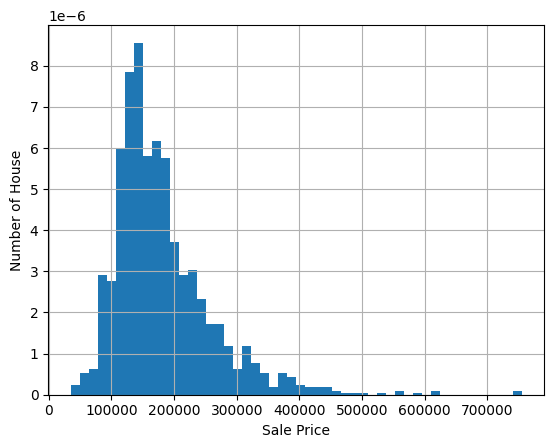

In [5]:
# Histogram to evaluate target distribution
data['SalePrice'].hist(bins=50, density=True)

plt.ylabel('Number of House')
plt.xlabel('Sale Price')
plt.show()

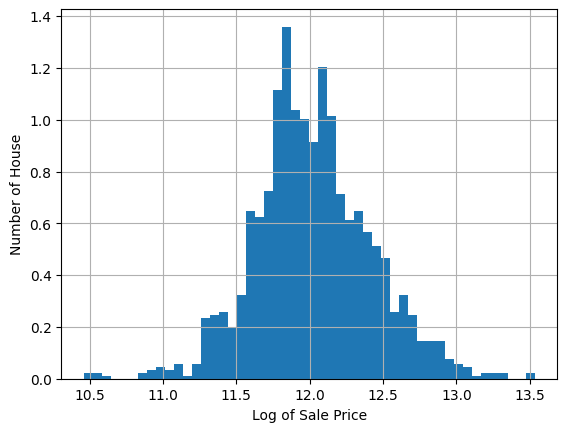

In [6]:
# Let's transform the target using the Logarithm
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of House')
plt.xlabel('Log of Sale Price')
plt.show()

## Variable Types

In [7]:
# Identify the categorical variables and capture those of type "Object"
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass is also categorical by definition, despite its numeric values
# Add MSSubClass to the list of categorical variables
cat_vars = cat_vars + ['MSSubClass']

# Number of categorical variables
len(cat_vars)

44

In [8]:
# cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')

In [9]:
# Identify the numerical variables

num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']

# Number of numerical variables
len(num_vars)

35

## Missing Values

In [10]:
# Make a list of the variables that contain missing value
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# Determine percentage of missing values and display the result ordered by % of missing data
data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

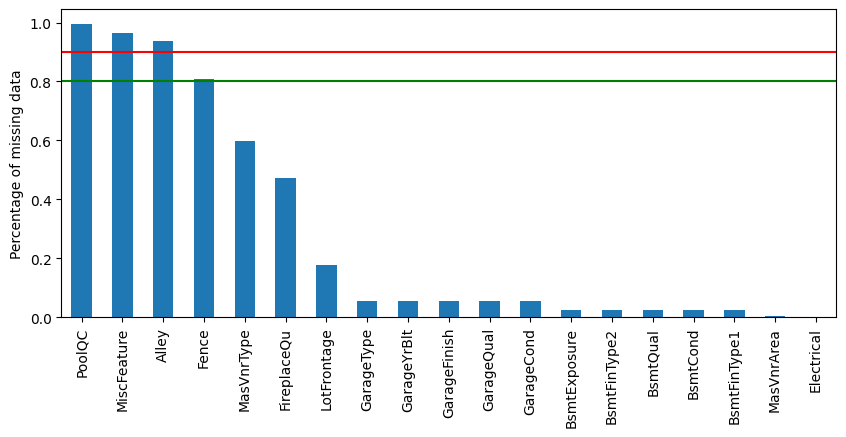

In [11]:
data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [12]:
# Determine which variables from those with missing data are numerical and which are categorical
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


In [13]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [14]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Relationship between missing data and Sale Price

In [15]:
def analyse_na_value(df, var):
    # Copy of the dataframe, so not override the original data
    df = df.copy()

    # Make an interim variable that indicates 1 if the observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # Compare the median SalePrice in the observation where data is missing vs the observations where data is available
    
    # Determine the median price in the group 1 and 0, and the standard deviation of the sale price, and capture the results in a temporary dataset
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # Plot into a bar graph
    tmp.plot(kind='barh', y='mean', legend=False, xerr='std', title='Sale Price', color='green')

    plt.show()

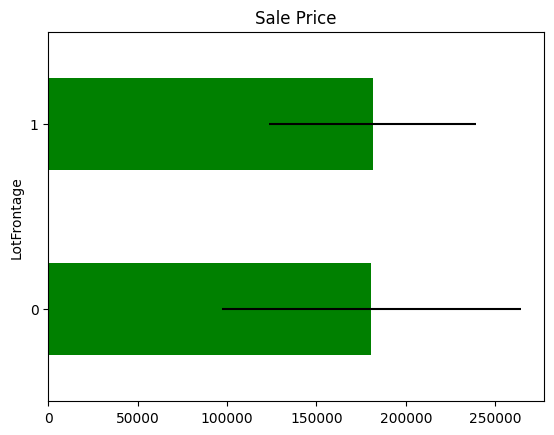

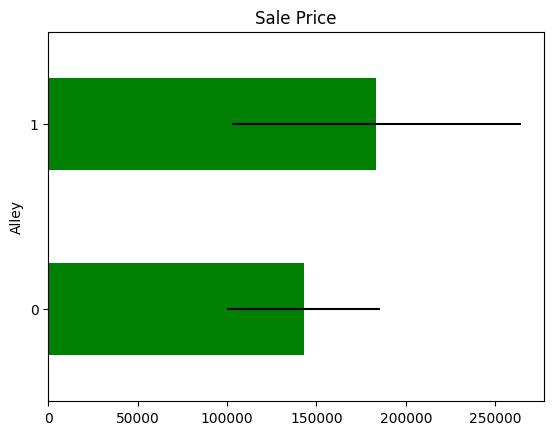

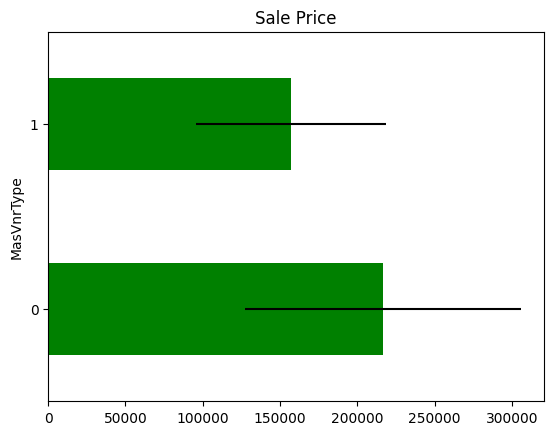

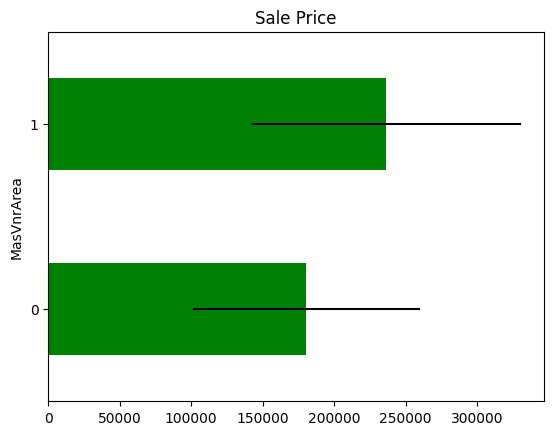

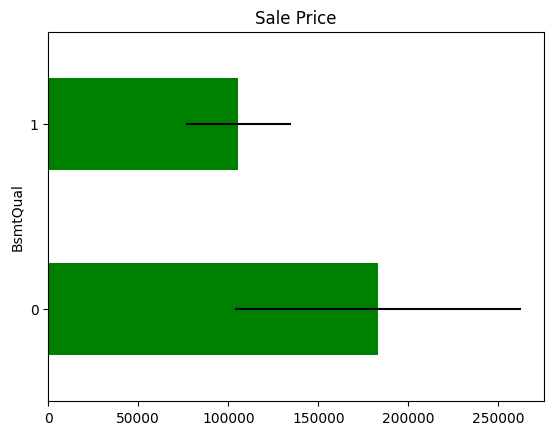

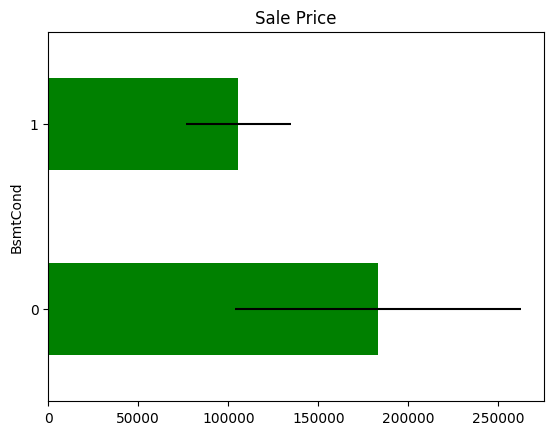

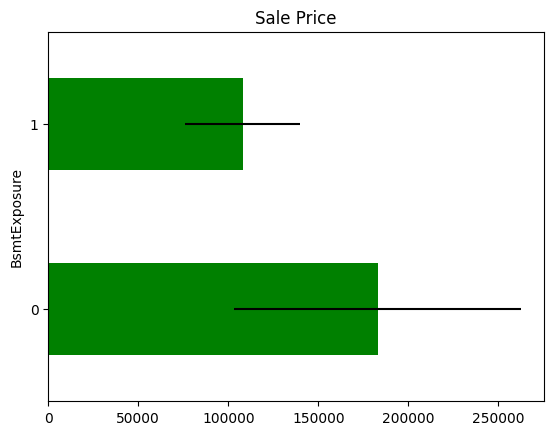

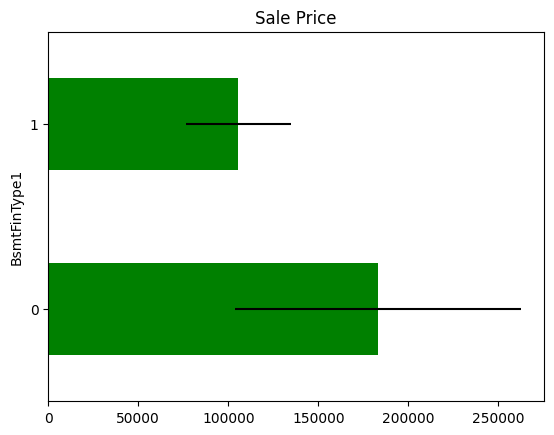

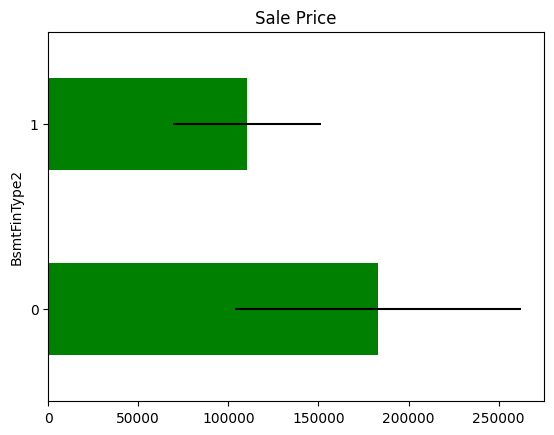

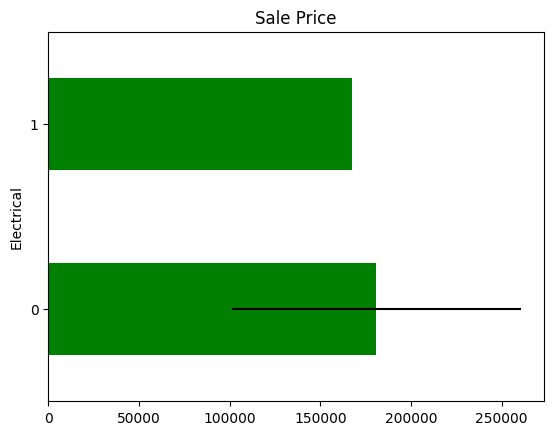

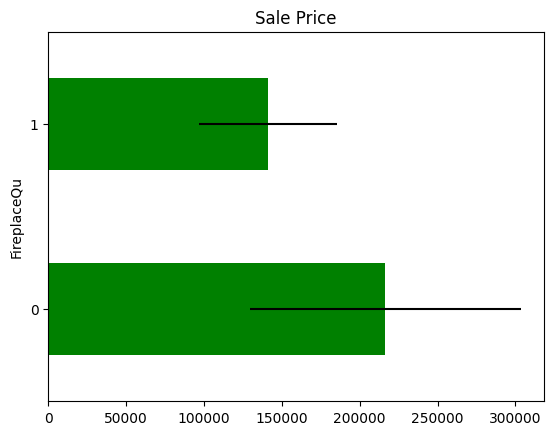

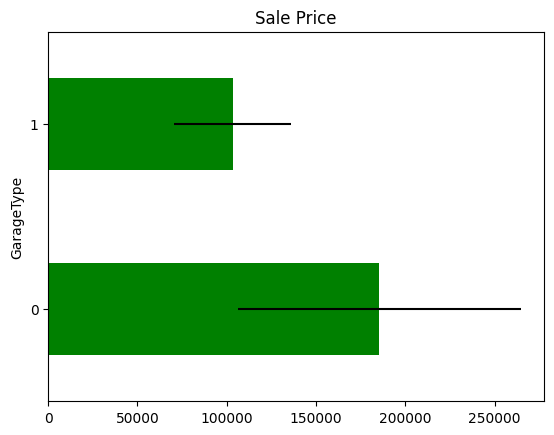

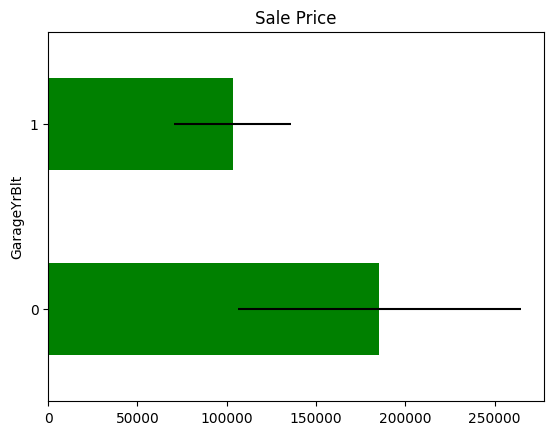

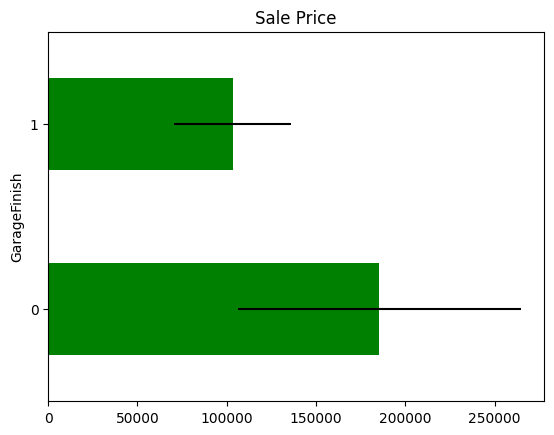

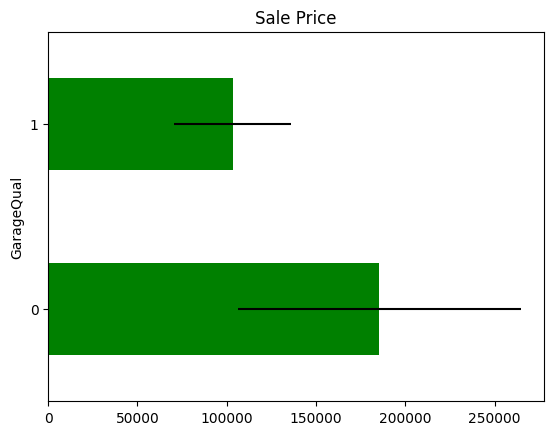

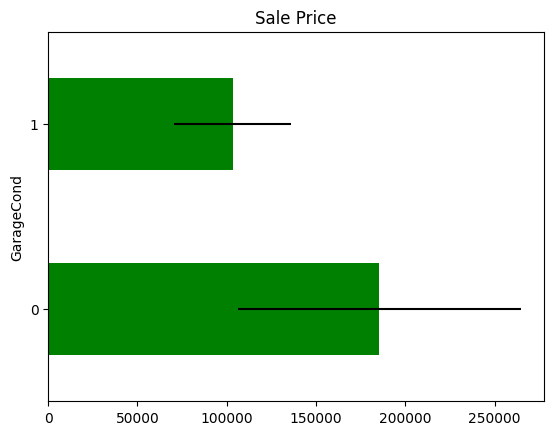

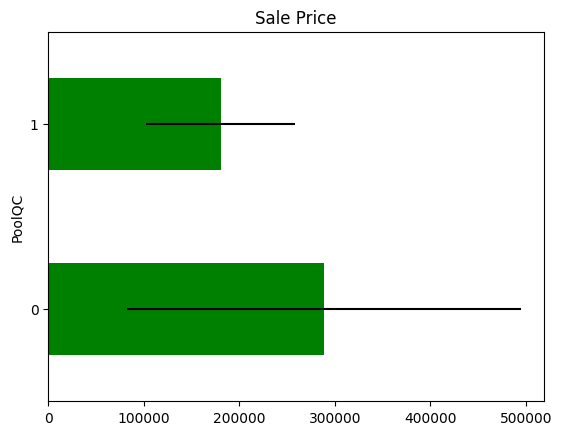

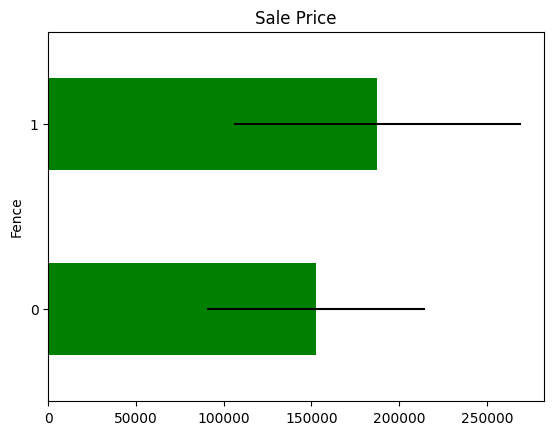

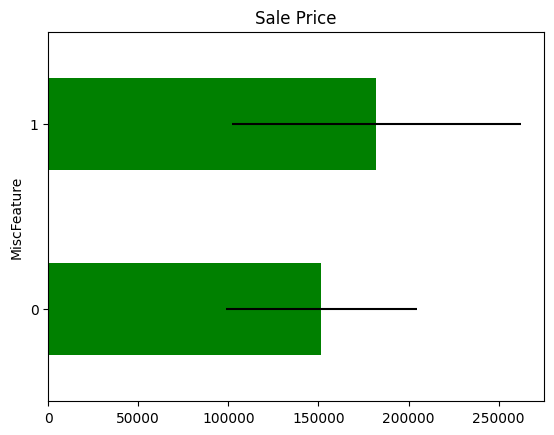

In [16]:
# Run the function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(data, var)

## Numerical Variables

In [17]:
print('Number of numerical variables: ', len(num_vars))

# Visualize the numerical variables
data[num_vars].head()

Number of numerical variables:  35


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

## Temporal Variables

In [18]:
# List of variables that certain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
# Explore the values of these temporal variables

for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0, 0.5, 'Median House Price')

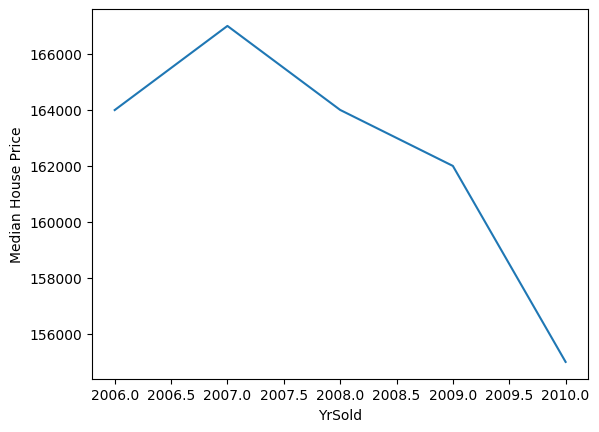

In [20]:
# Plot median sale price vs year in which it was sold
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Text(0, 0.5, 'Median House Price')

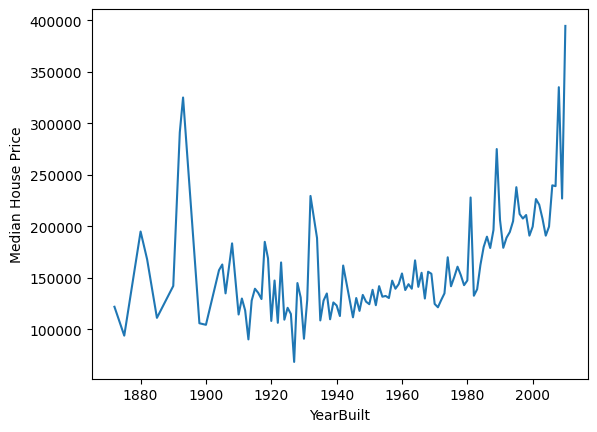

In [21]:
# Plot median sale price vs year in which it was built
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

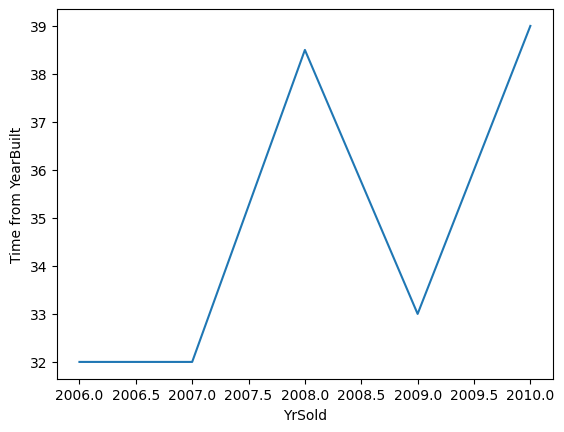

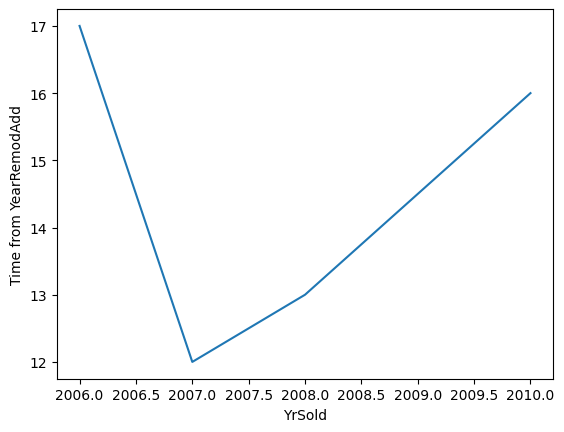

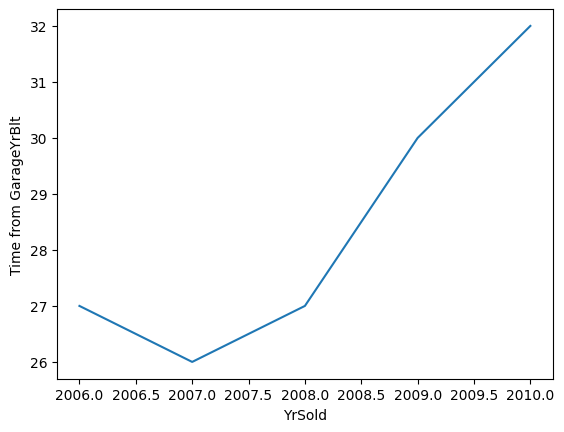

In [22]:
def analyse_year_vars(df, var):
    df = df.copy()

    # Capture difference between a year variable and year in which the house was sold
    df[var] = df['YrSold'] - df[var]

    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(data, var)

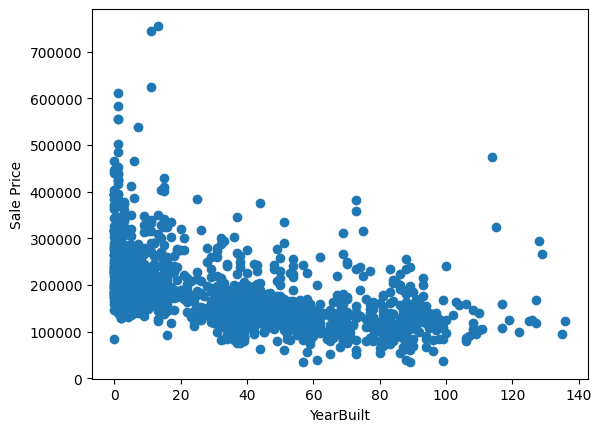

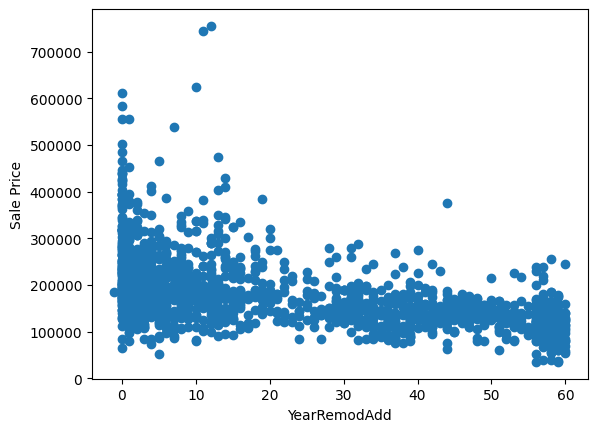

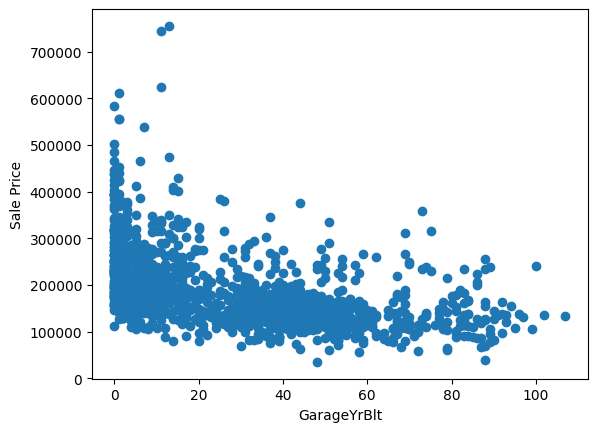

In [23]:
def analyse_year_vars(df, var):
    df = df.copy()

    # Capture difference between a year variable and year in which the house was sold
    df[var] = df['YrSold'] - df[var]

    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('Sale Price')
    plt.xlabel(var)
    
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(data, var)

## Discrete Variables

In [24]:
# Make a list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in year_vars]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [25]:
# Visualize the discrete variables
data[discrete_vars].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

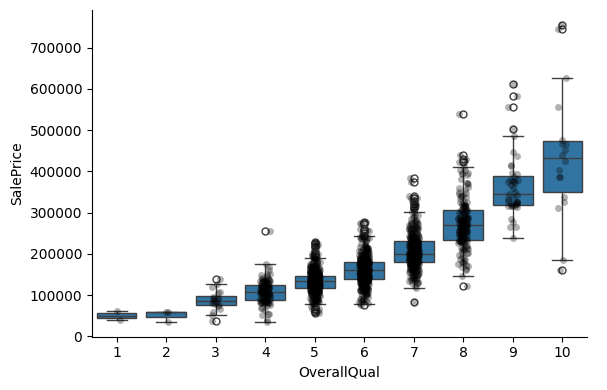

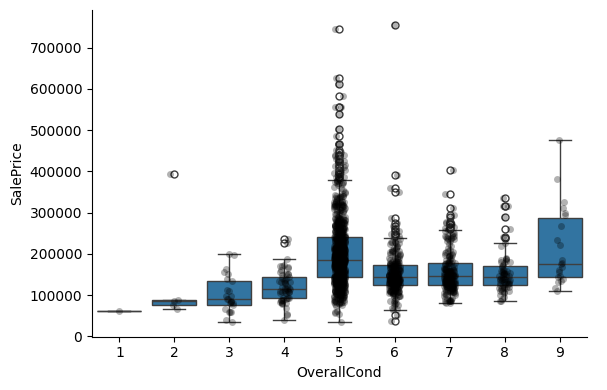

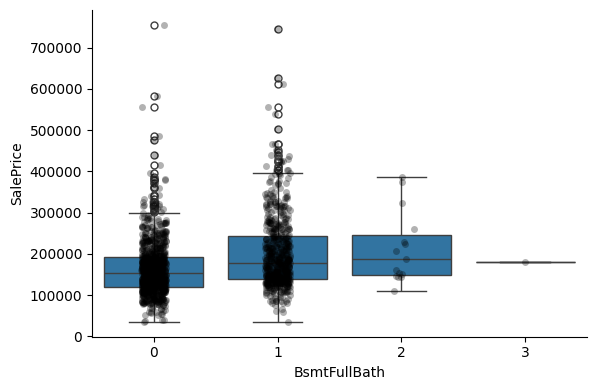

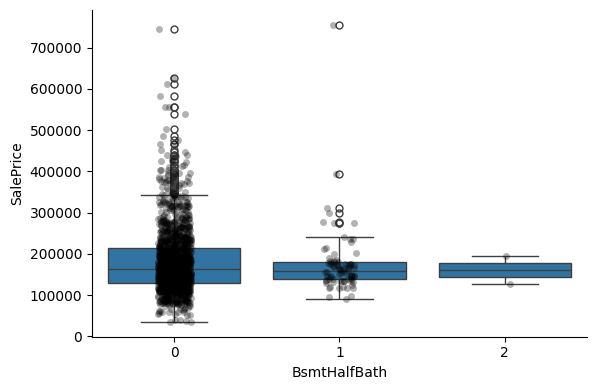

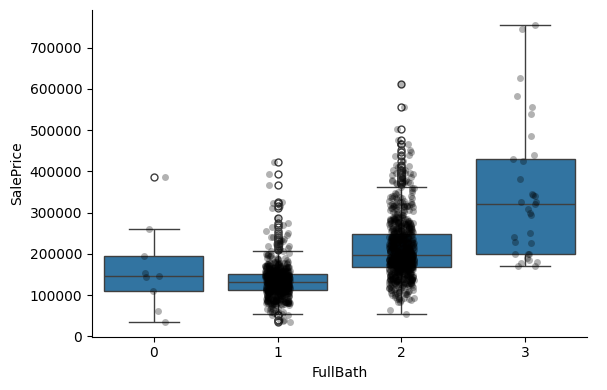

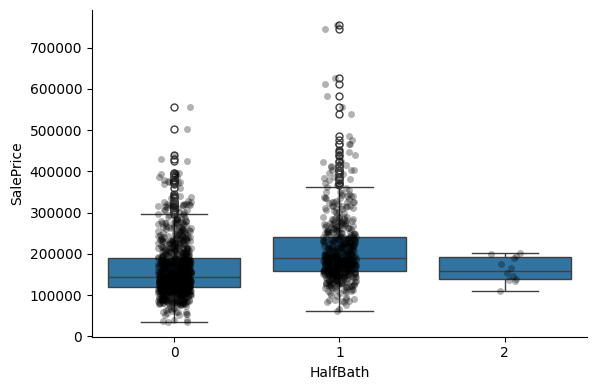

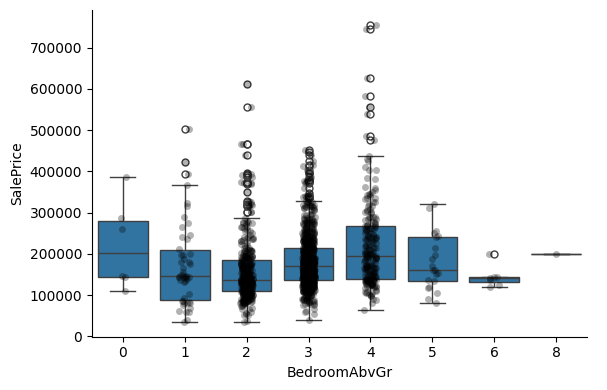

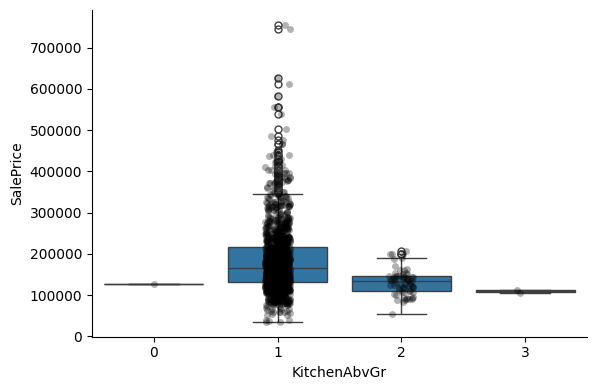

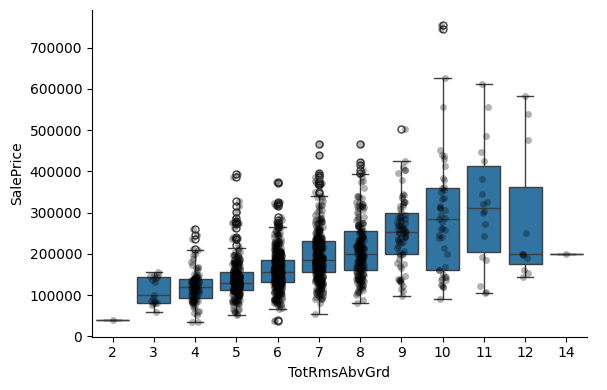

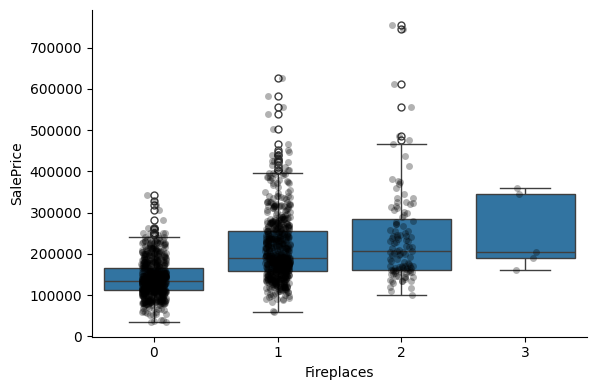

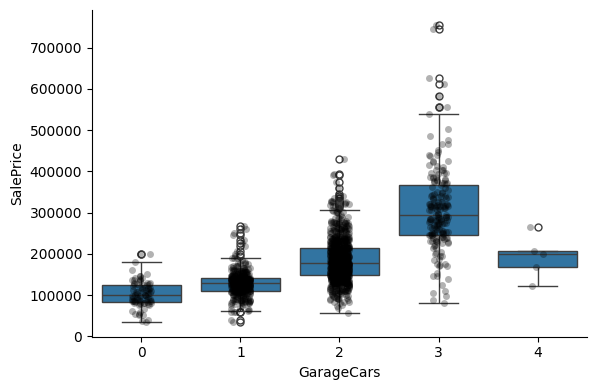

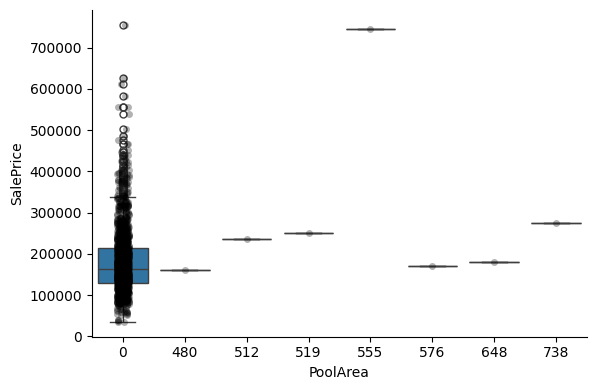

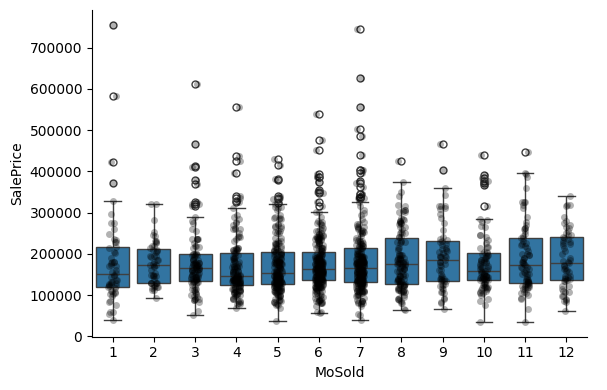

In [26]:
for var in discrete_vars:
    # Make boxplot with catplot
    sns.catplot(x=var,y='SalePrice', data=data, kind='box', height=4, aspect=1.5)

    # Add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')

    plt.show()

## Continuous Variables

In [27]:
# Make list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars + year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


In [28]:
# Visualize the continuous variables
data[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

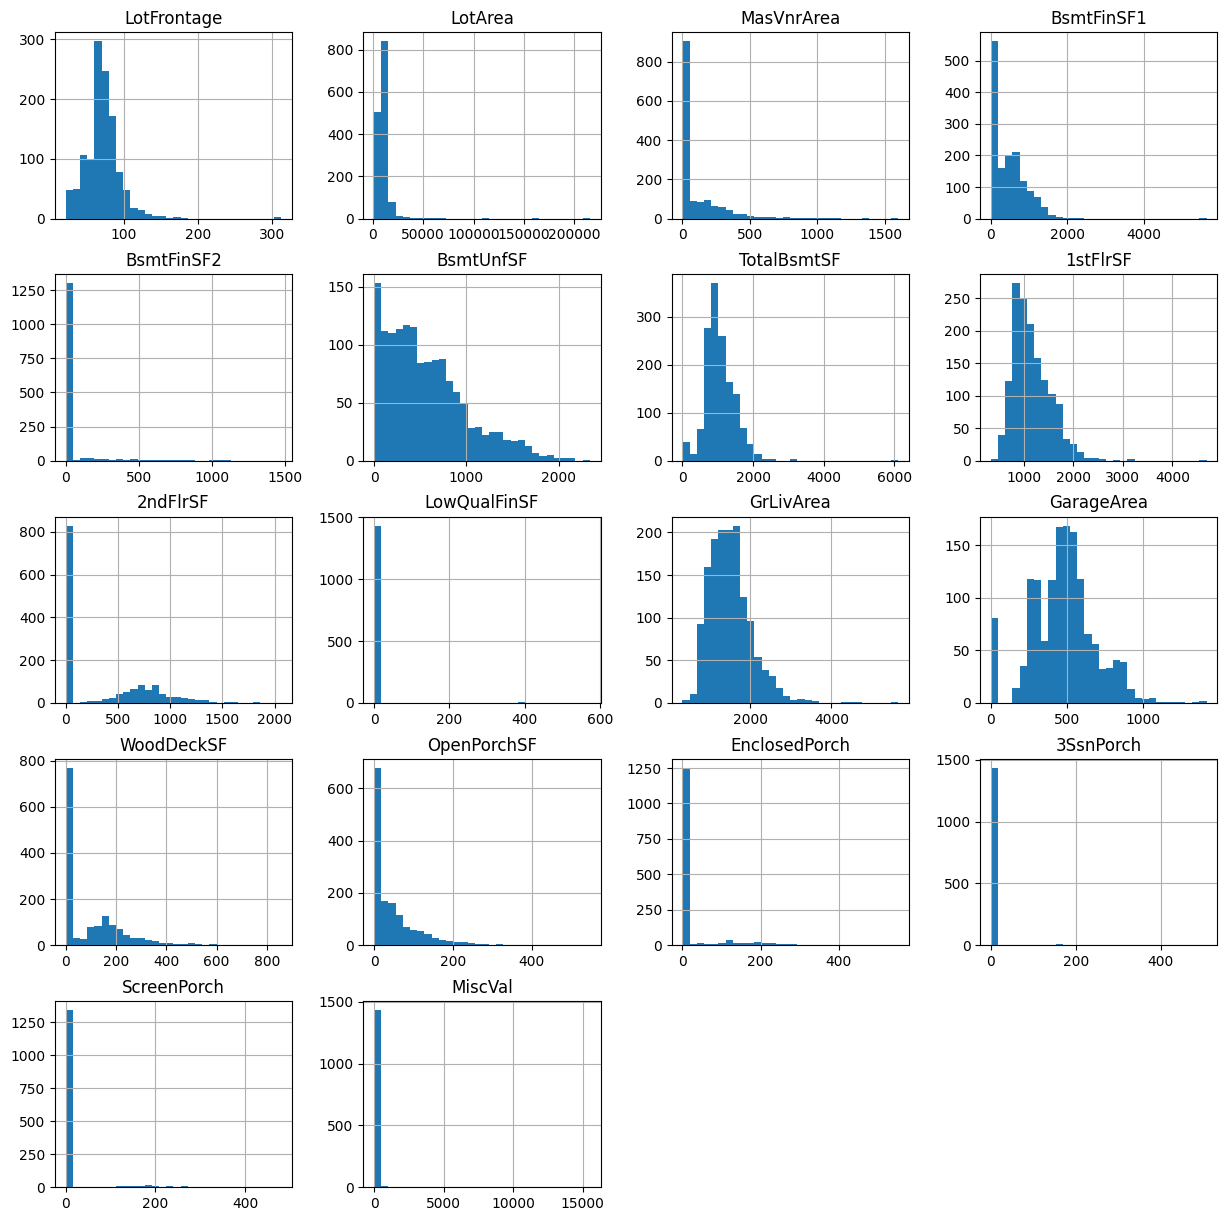

In [29]:
# Plot histogram for all continuous variables
data[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [30]:
# Make a list with the super skewed variables for later
skewed = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

In [31]:
# Capture the remaining continuous variables
cont_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',]

C:\Users\biota\AppData\Local\Temp\ipykernel_11216\2314898019.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace([np.inf, -np.inf], np.nan, inplace=True)


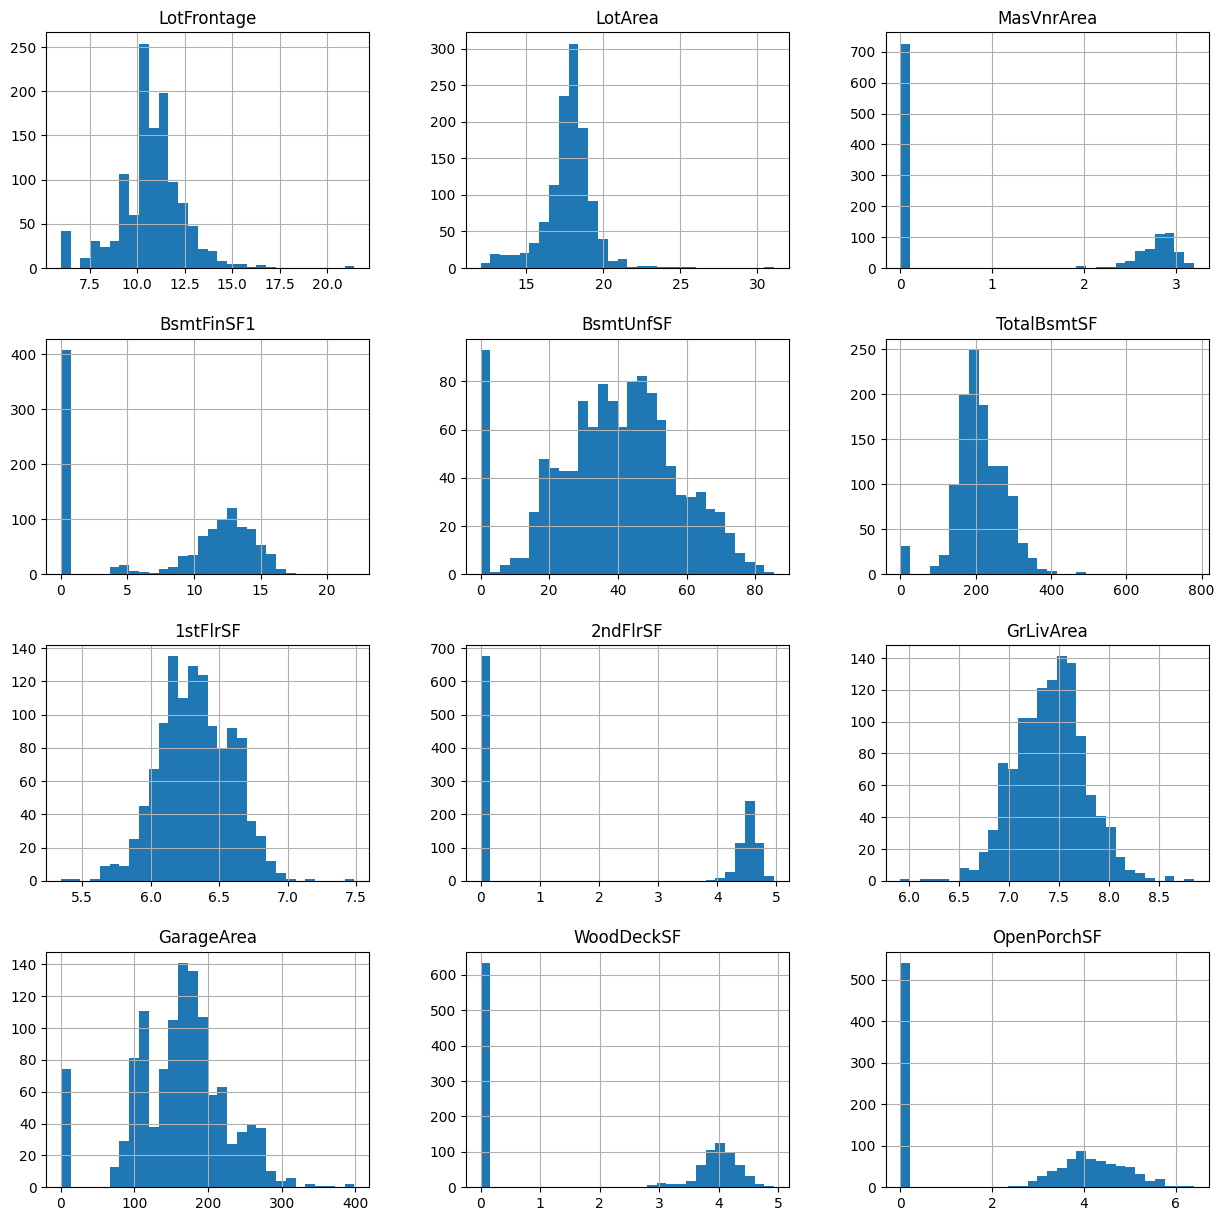

In [32]:
# Check for non-finite values and replace/drop
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=cont_vars, inplace=True)

# Analyze the distributions of the variables after apllying a yeo-johnson transformation
tmp = data.copy()

for var in cont_vars:
    # transform the variable - yeo-johnson
    tmp[var], param = stats.yeojohnson(data[var])

# Plot the histogram of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

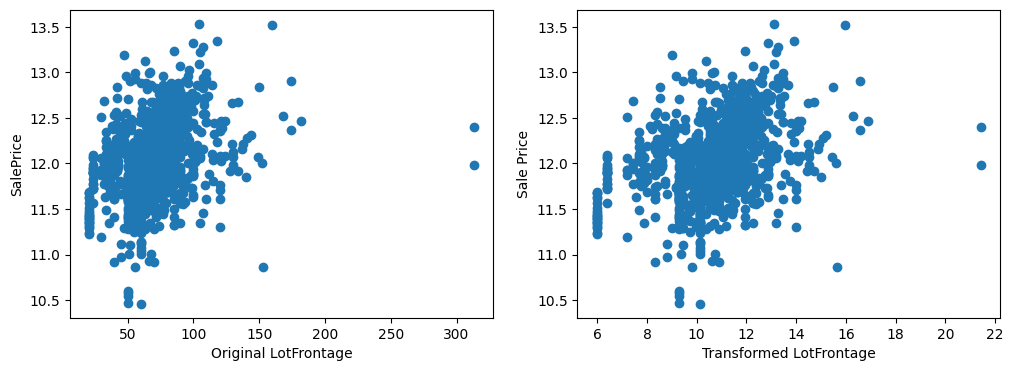

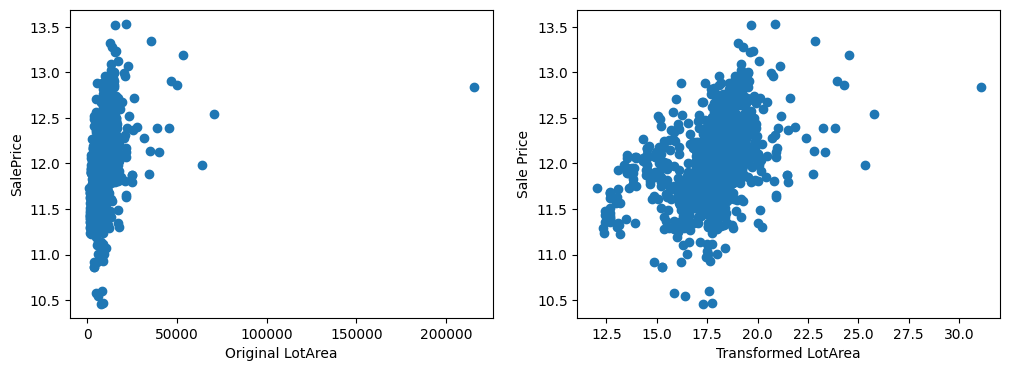

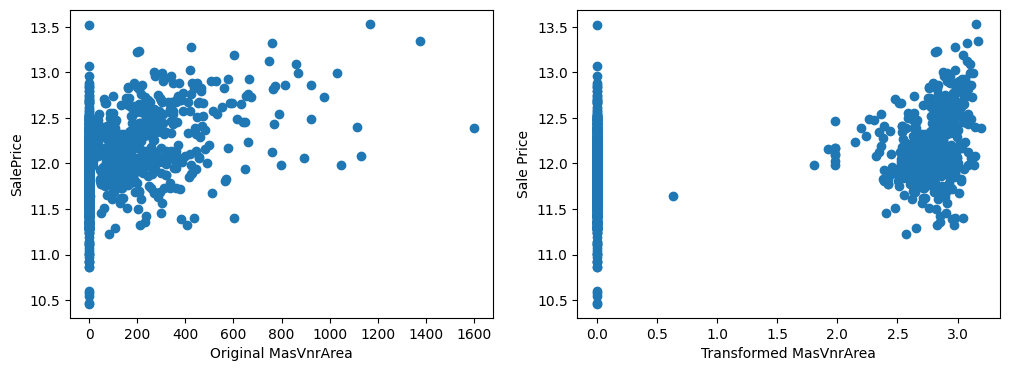

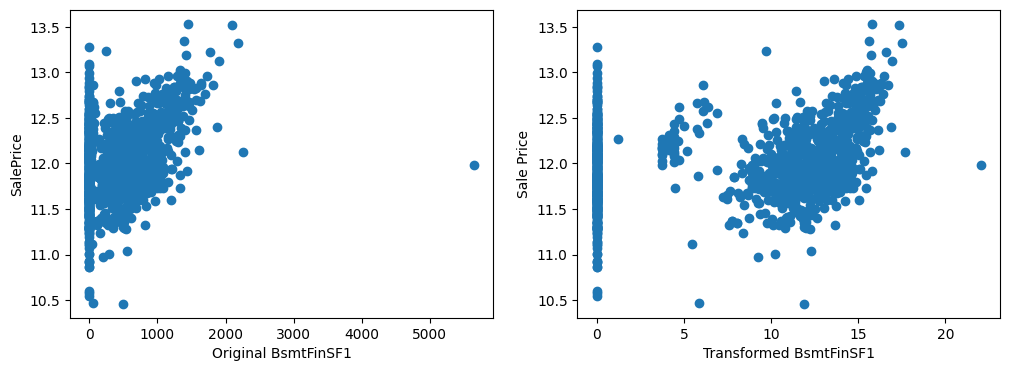

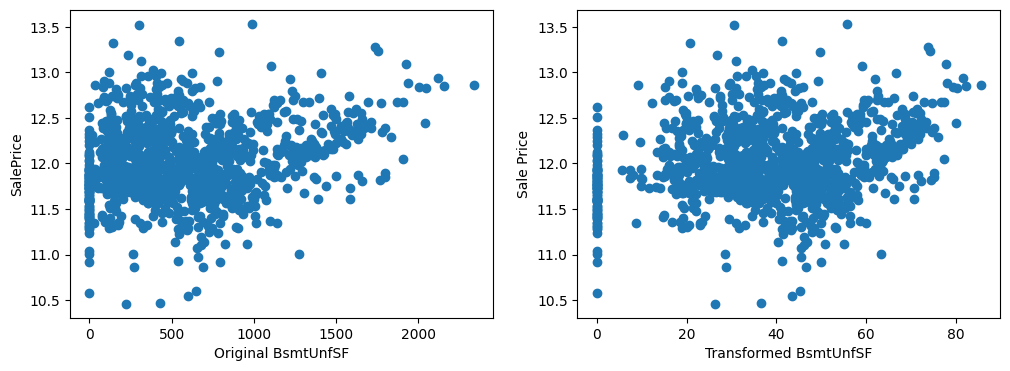

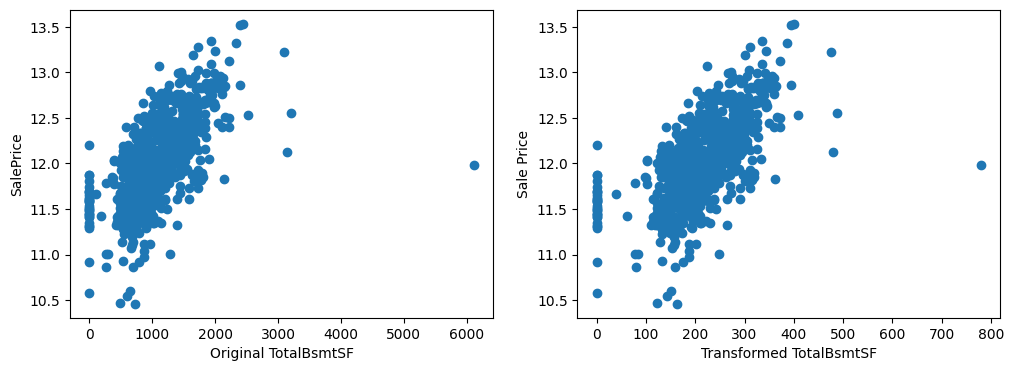

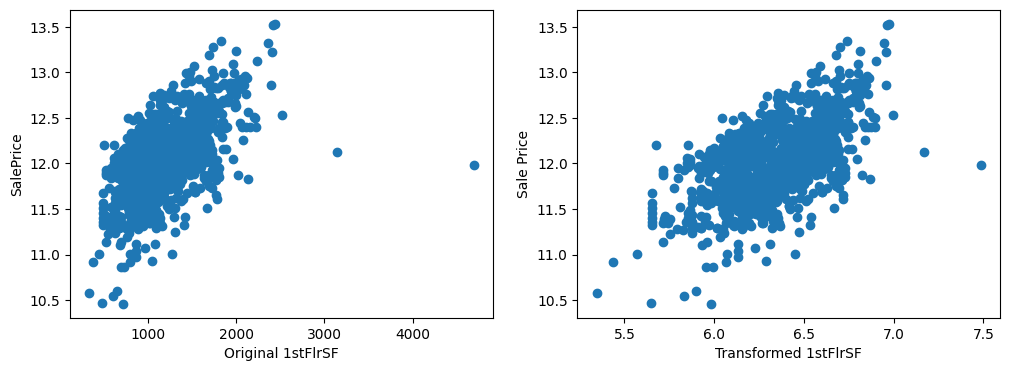

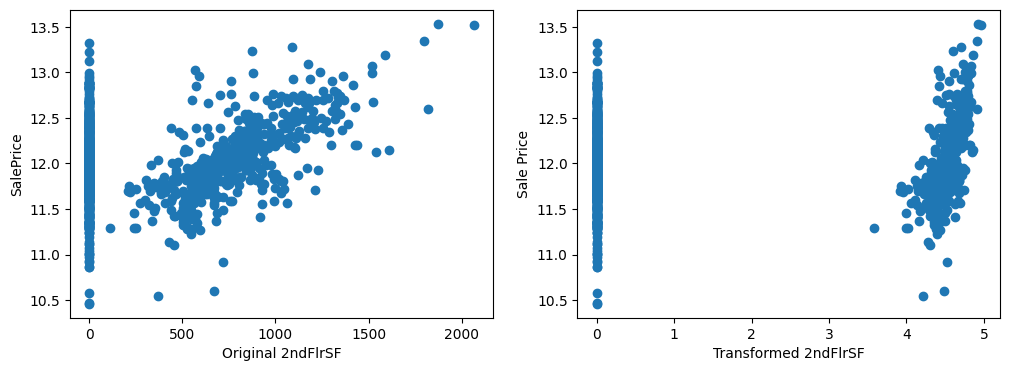

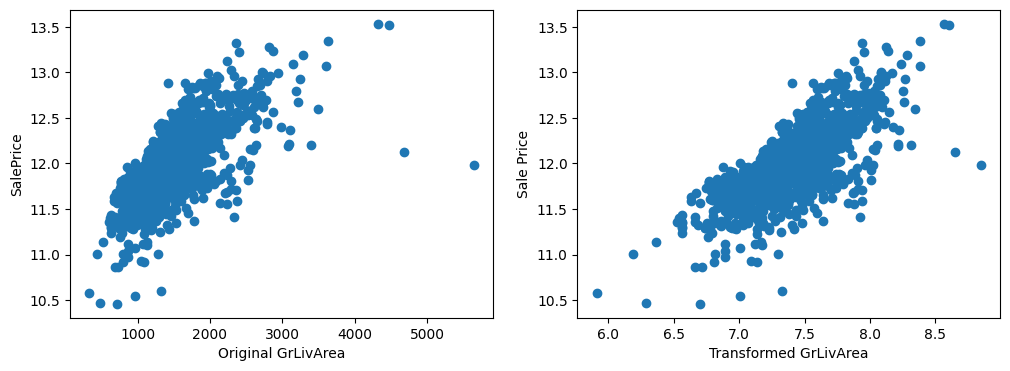

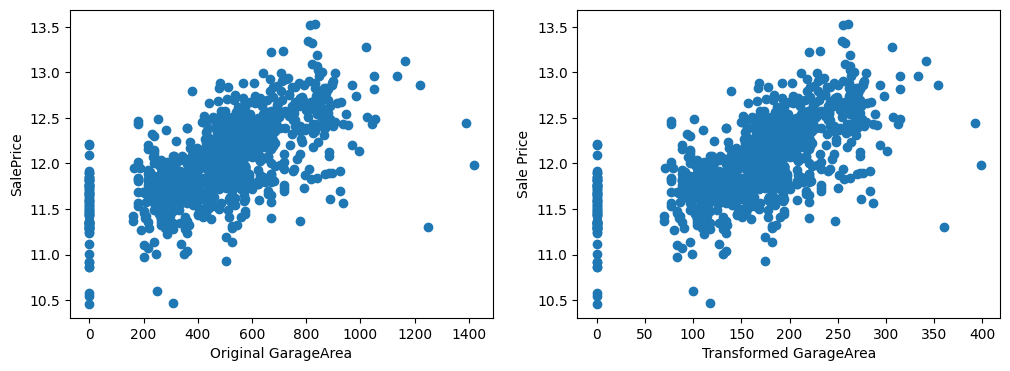

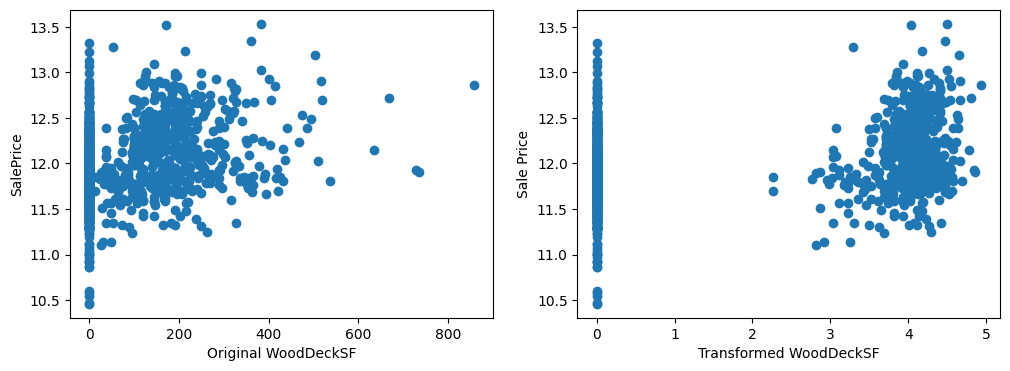

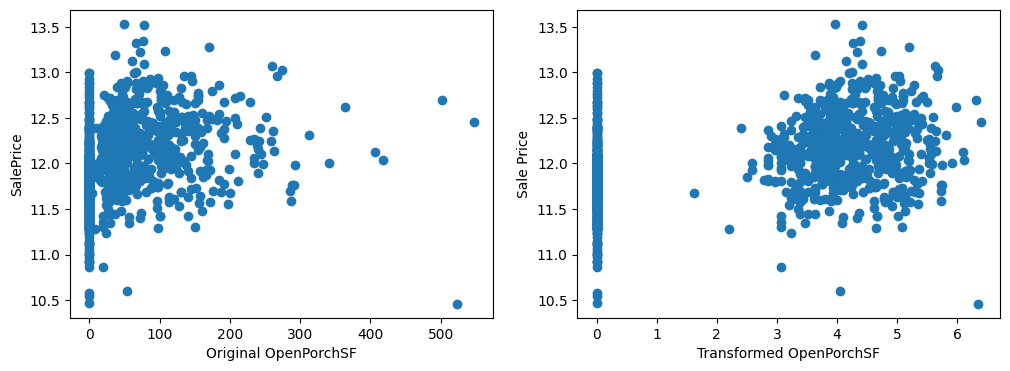

In [33]:
# Plot the original or transformed variables vs sale price, and see if there is a relationship
for var in cont_vars:
    plt.figure(figsize=(12, 4))

    # Plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('SalePrice')
    plt.xlabel('Original ' + var)

    # Plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

## Logaritmic Transformation

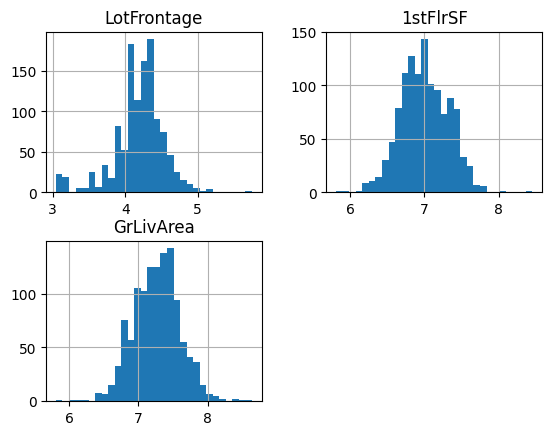

In [34]:
# Analyze the distribution of these variables after applying a logaritmic transformation
tmp = data.copy()

for var in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
    # Transform the variable with logarithm
    tmp[var] = np.log(data[var])

tmp[['LotFrontage', '1stFlrSF', 'GrLivArea']].hist(bins=30)
plt.show()

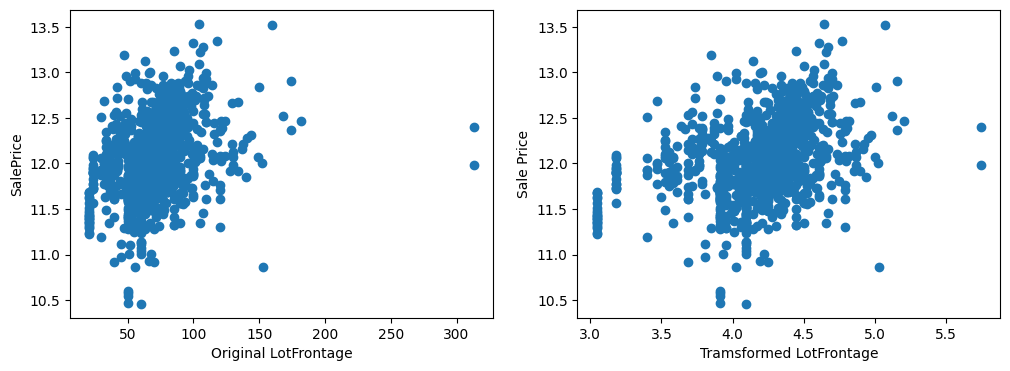

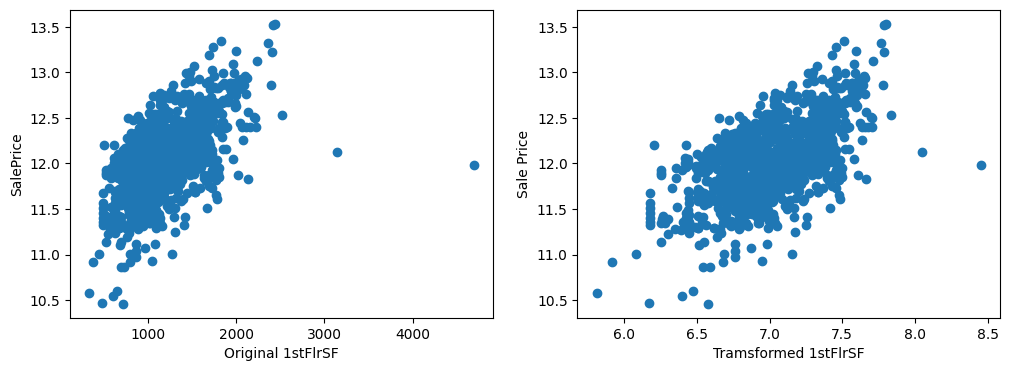

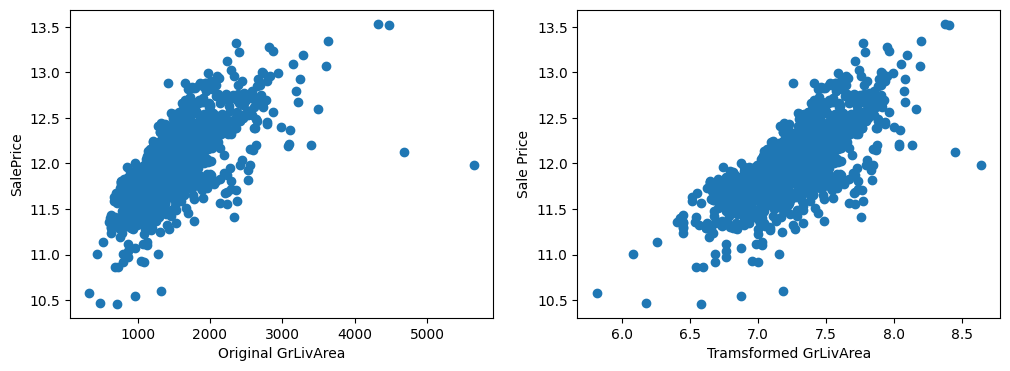

In [35]:
# Plot the original or transformed variables vs sale price, and see there is a relationship
for var in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
    plt.figure(figsize=(12, 4))

    # Plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('SalePrice')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Tramsformed ' + var)

    plt.show()

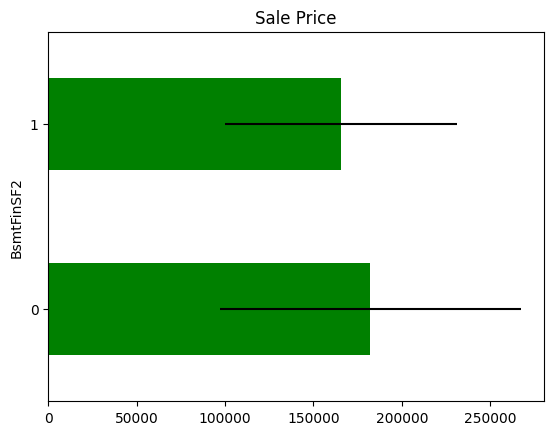

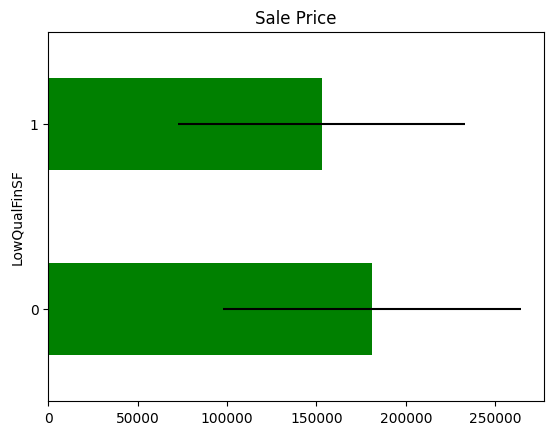

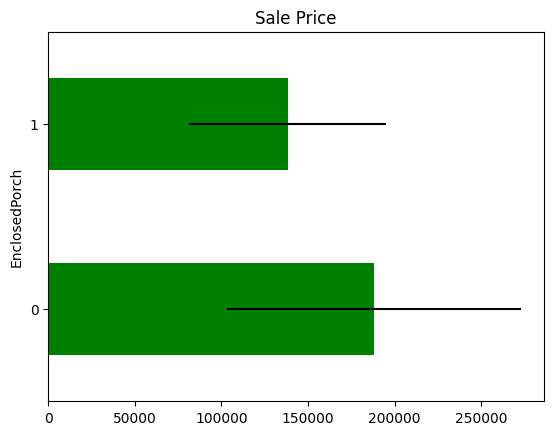

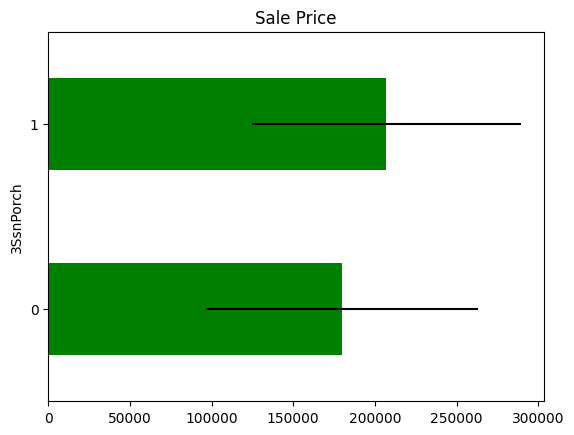

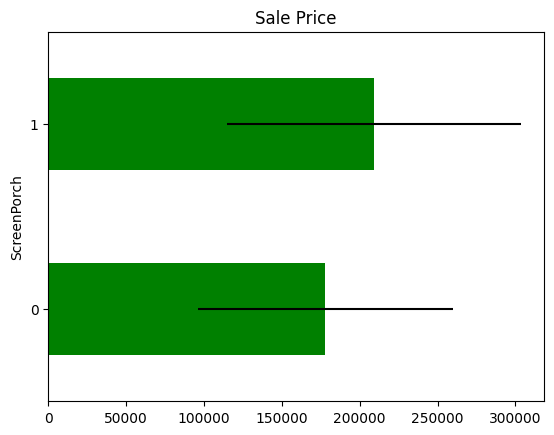

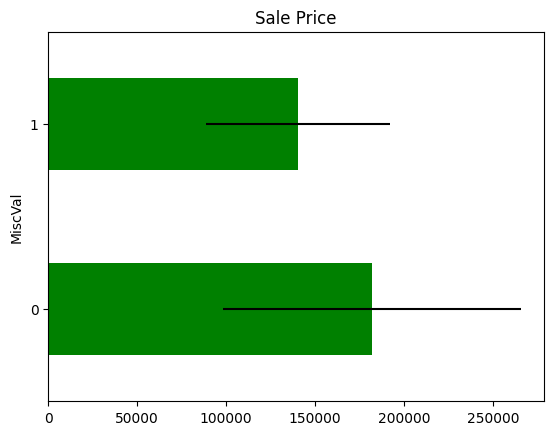

In [36]:
for var in skewed:
    tmp = data.copy()

    # Map the variable values into 0 and 1
    tmp[var] = np.where(data[var] == 0, 0, 1)

    # Determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # Plot into a bar graph
    tmp.plot(kind='barh', y='mean', legend=False, xerr='std', title='Sale Price', color='green')

    plt.show()

## Categorical Variables

In [37]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  44


In [38]:
# Visualize the values of the categorical variables
data[cat_vars].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  MSSubClass  
0       WD        Normal          60  
1       WD        Normal          20  
2       WD        Normal          60  
3       WD       Abnorml          70  
4       WD        Normal          60

<Axes: >

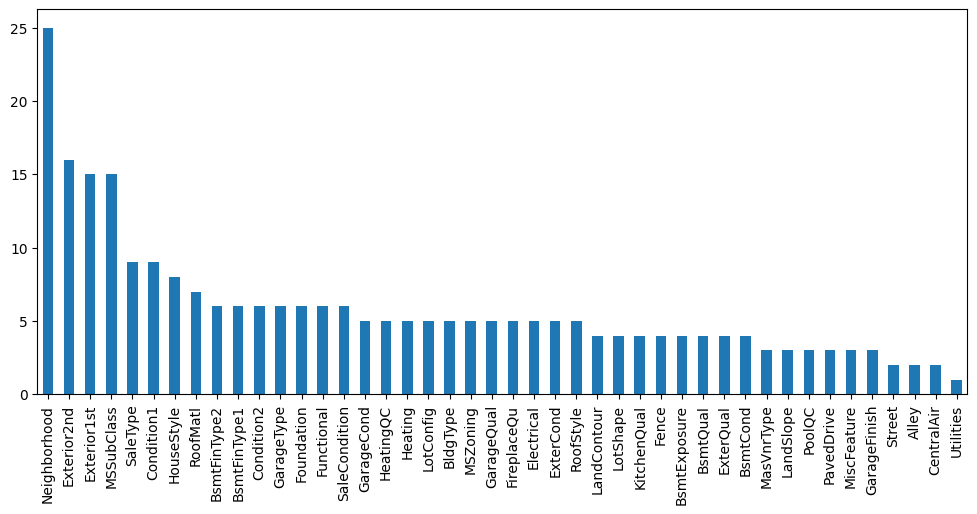

In [39]:
# Count unique categories with pandas unique() and then plot them in descending order
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12, 5))

## Quality Variables

The mappings can be obtained from the Kaggle Website. One example:

- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa = Fair
- Po = Poor

In [40]:
# Re-Map strings to numbers, which determine quality
qual_mappings = {
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5,
    'Missing': 0,
    'NA': 0
}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
for var in qual_vars:
    data[var] = data[var].map(qual_mappings)

In [41]:
exposure_mappings = {
    'No': 1,
    'Mn': 2,
    'Av': 3,
    'Gd': 4,
    'Missing': 0,
    'NA': 0
}

var = 'BsmtExposure'
data[var] = data[var].map(exposure_mappings)

In [42]:
finish_mapping = {
    'Missing': 0,
    'NA': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']
for var in finish_vars:
    data[var] = data[var].map(finish_mapping)

In [43]:
garage_mappings = {
    'Missing': 0,
    'NA': 0,
    'Unf': 1,
    'RFn': 2,
    'Fin': 3
}

var = 'GarageFinish'
data[var] = data[var].map(garage_mappings)

In [44]:
fence_mappings = {
    'Missing': 0,
    'NA': 0,
    'MnWw': 1,
    'GdWo': 2,
    'MnPrv': 3,
    'GdPrv': 4
}

var = 'Fence'
data[var] = data[var].map(fence_mappings)

In [45]:
# Capture all quality variables
qual_vars = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

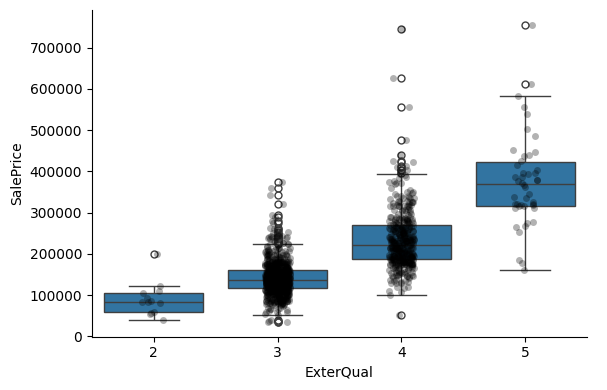

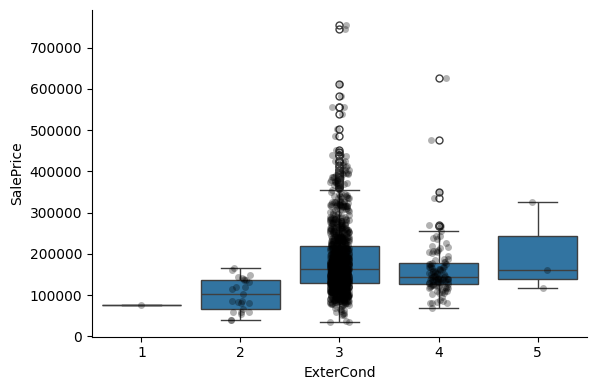

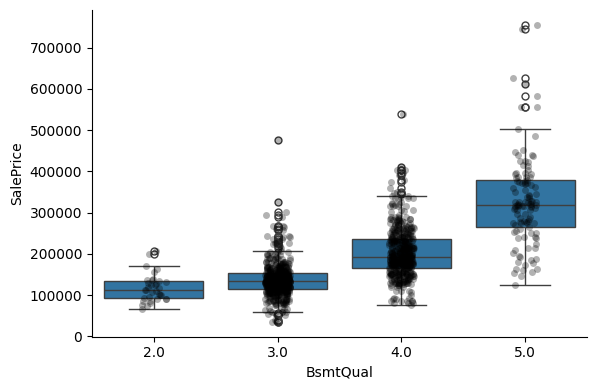

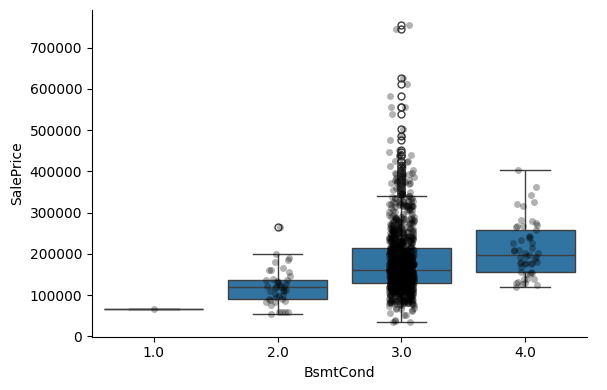

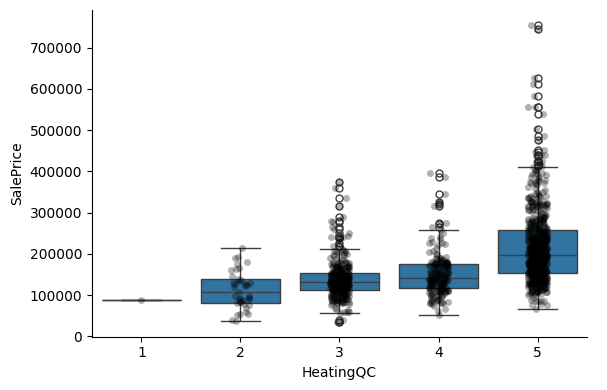

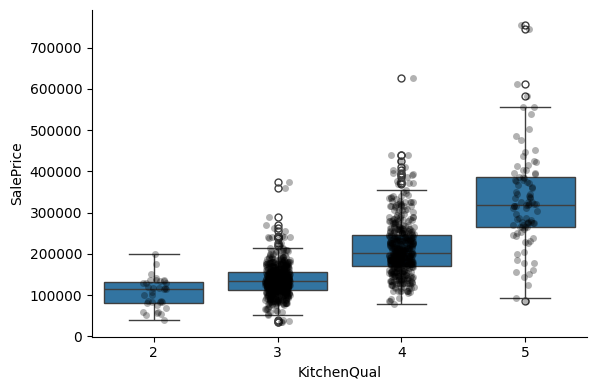

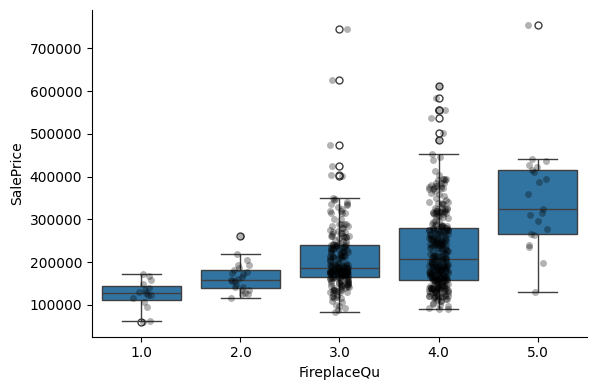

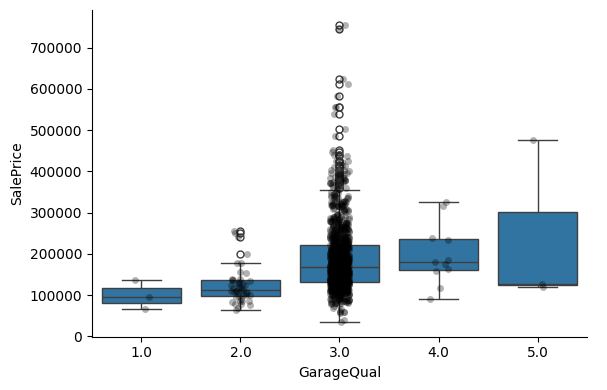

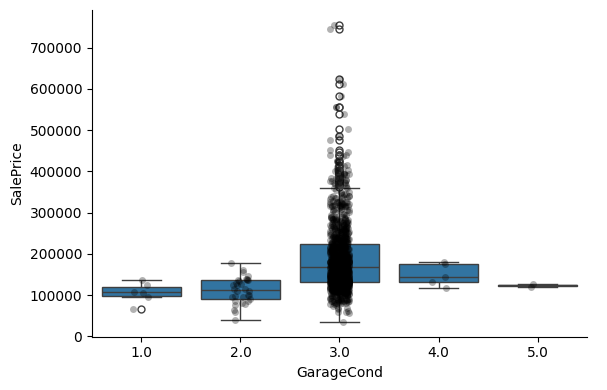

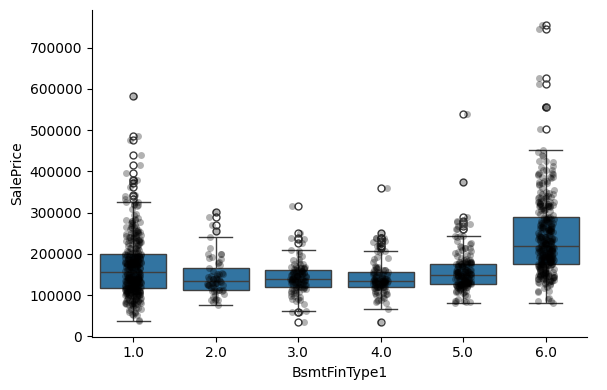

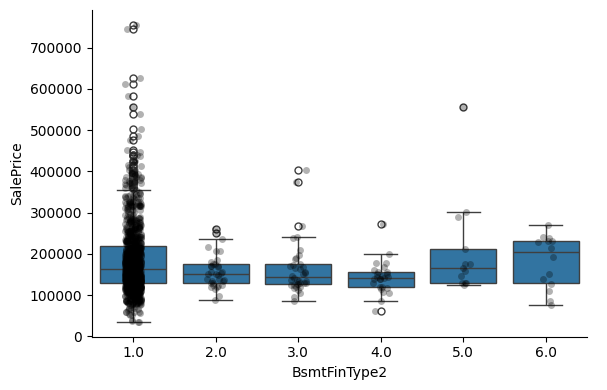

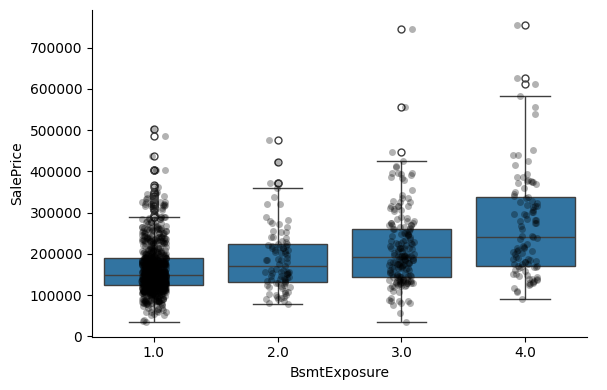

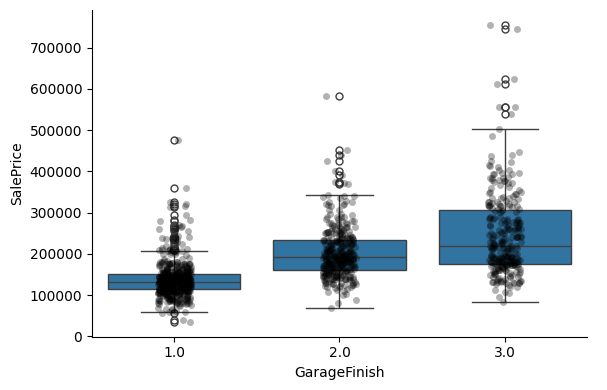

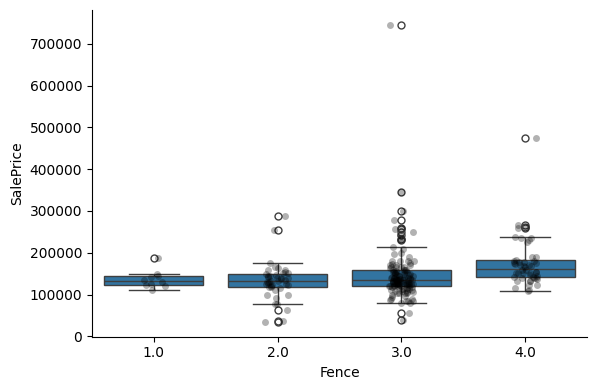

In [46]:
# Plot the house mean sale price based on the quality of the various attributes
for var in qual_vars:
    # Make boxplot with catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)

    # Add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')

    plt.show()

In [47]:
# Capture the remaining categorical variables
cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

## Rare labels

In [48]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than 1 % of the observation
for var in cat_others:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.008368
Name: SalePrice, dtype: float64

Street
Grvl    0.004184
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.005858
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Series([], Name: SalePrice, dtype: float64)

LotConfig
FR3    0.003347
Name: SalePrice, dtype: float64

LandSlope
Sev    0.004184
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001674
NPkVill    0.005858
Veenker    0.005858
Name: SalePrice, dtype: float64

Condition1
PosA    0.003347
PosN    0.007531
RRAe    0.007531
RRNe    0.000837
RRNn    0.003347
Name: SalePrice, dtype: float64

Condition2
Artery    0.001674
Feedr     0.005021
PosA      0.000837
PosN      0.001674
RRNn      0.001674
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
2.5Fin    0.006695
2.5Unf    0.008368
Name: SalePrice, dtype: float64

RoofStyle
Flat       0.005858
Gambrel    0.009205
Mansard    0.005858

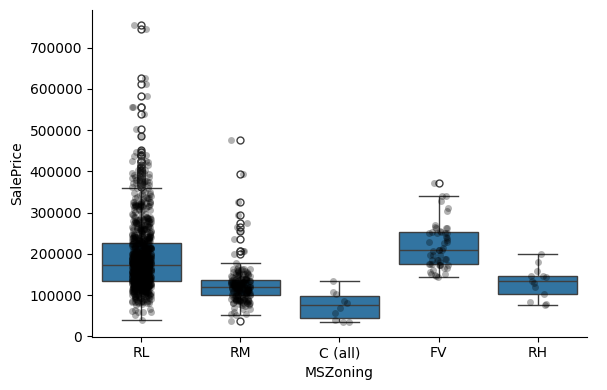

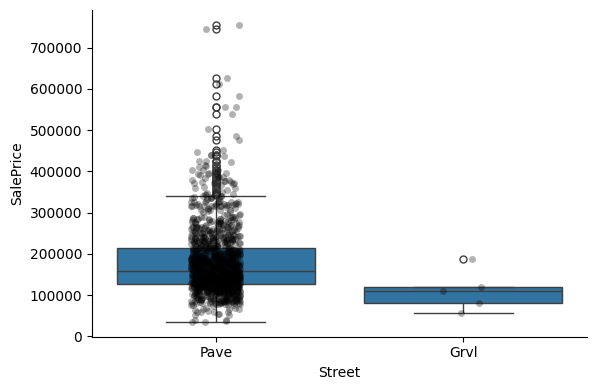

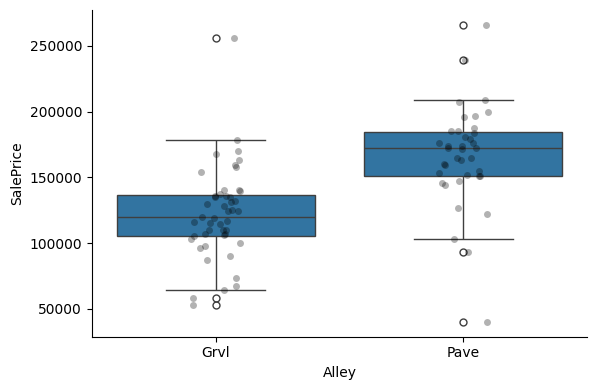

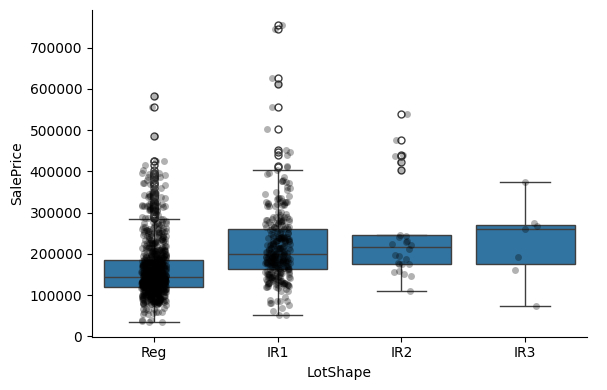

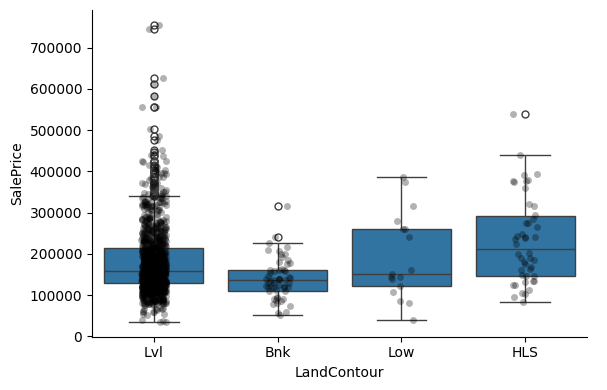

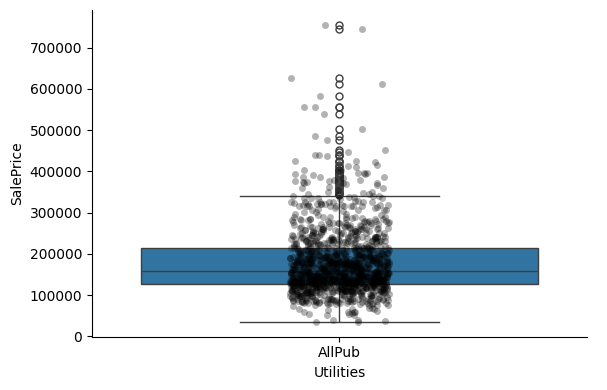

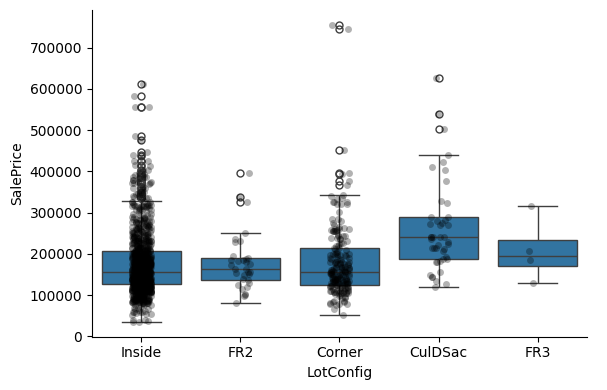

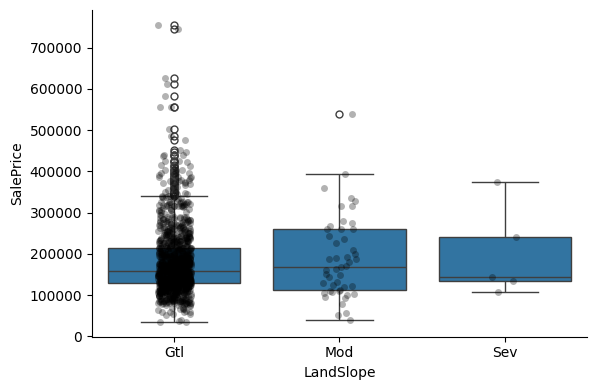

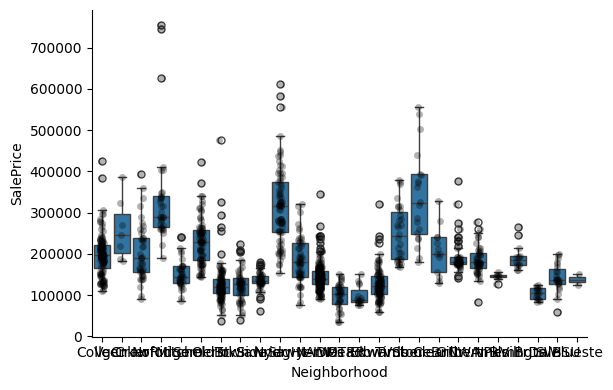

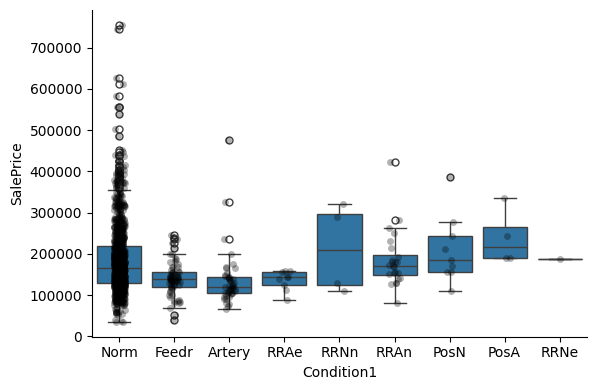

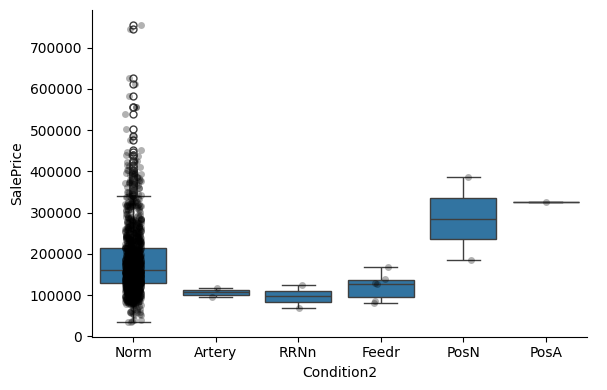

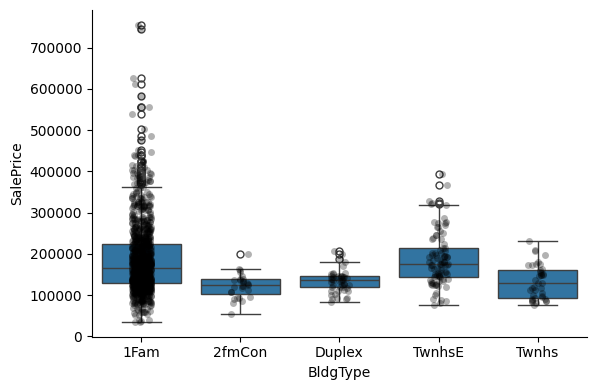

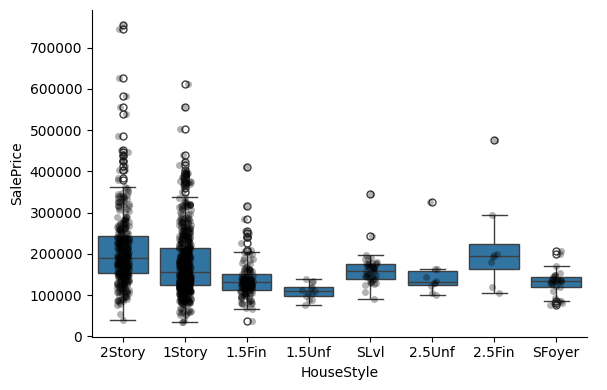

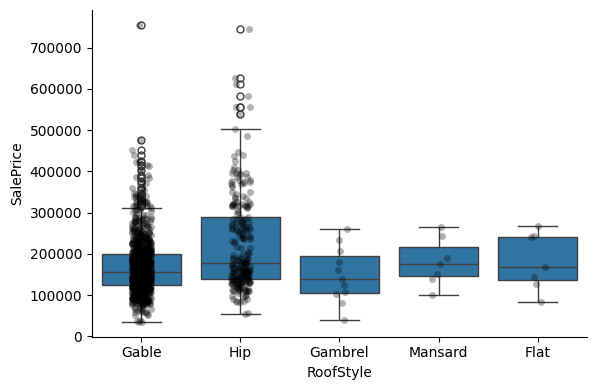

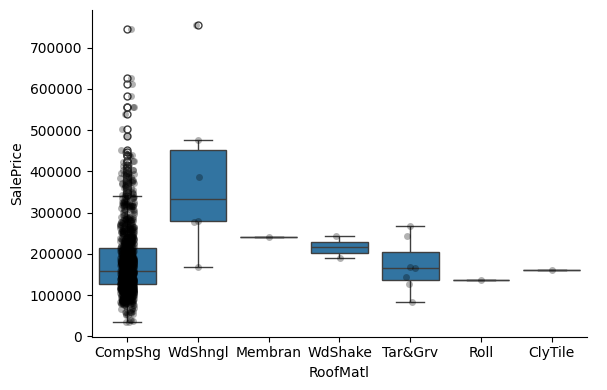

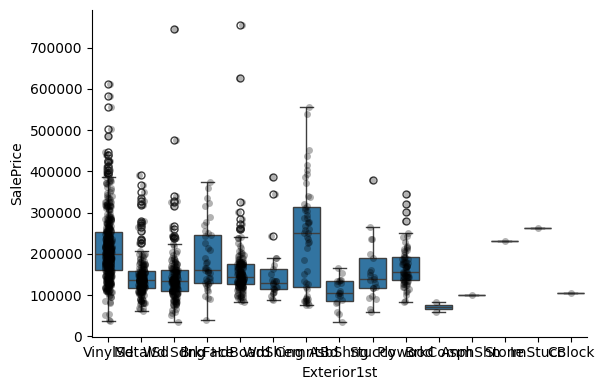

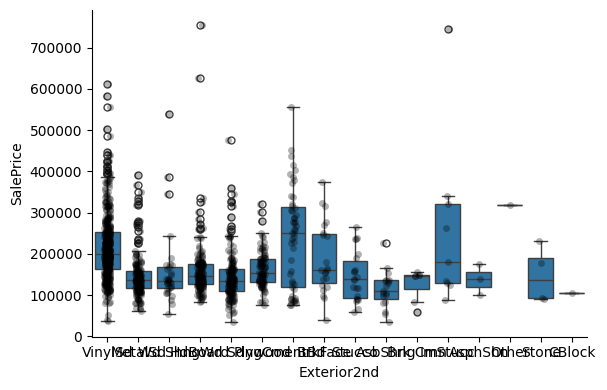

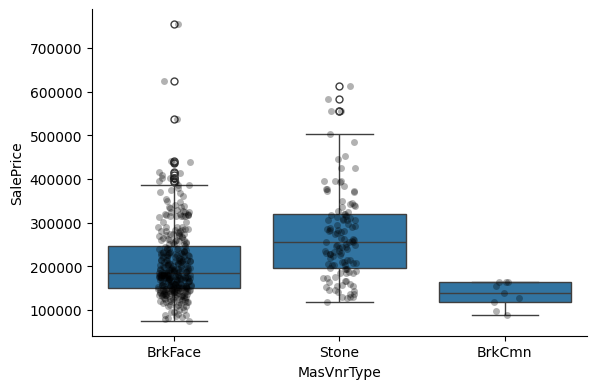

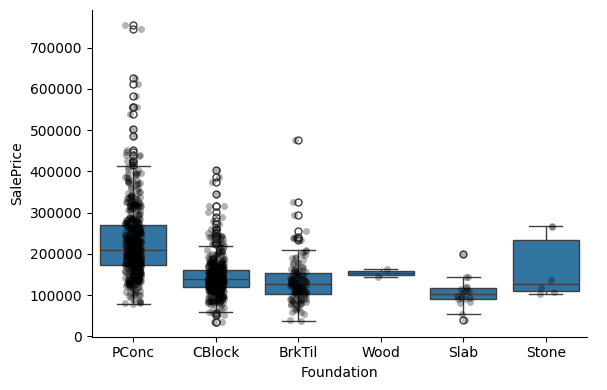

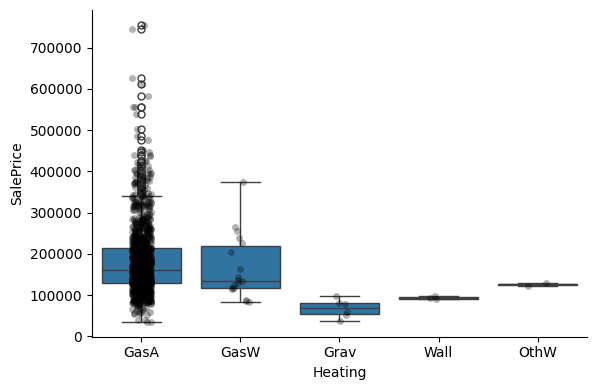

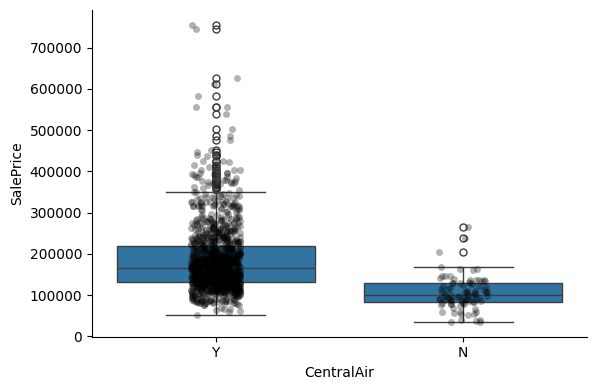

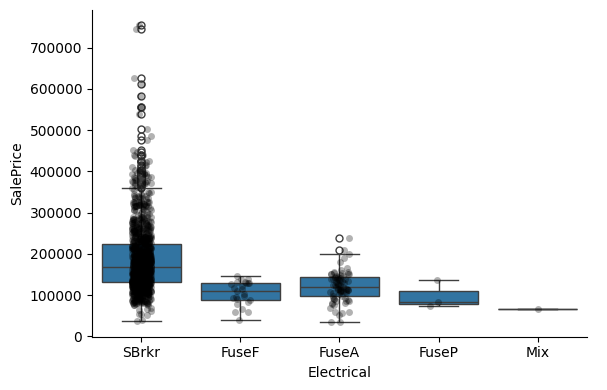

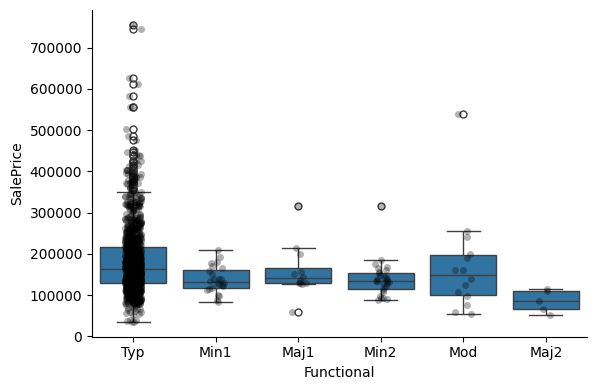

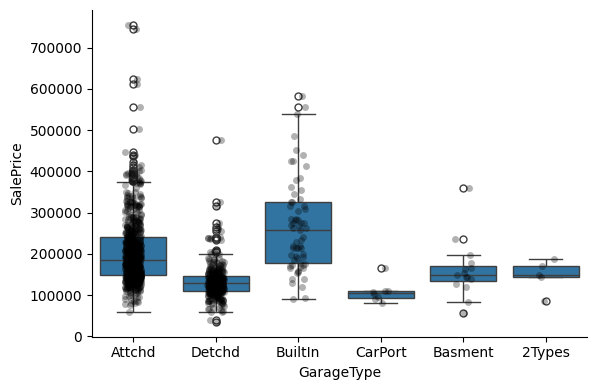

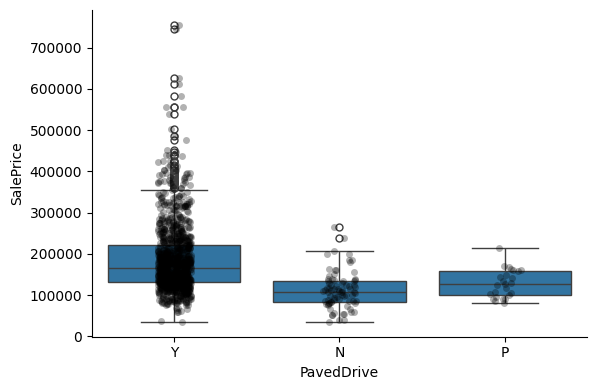

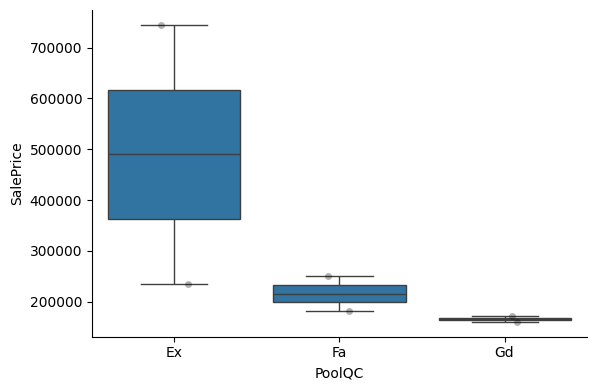

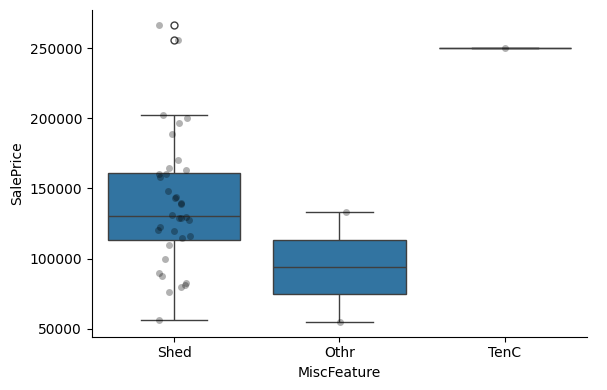

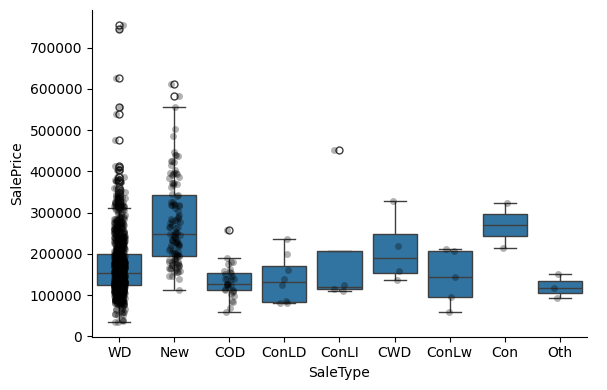

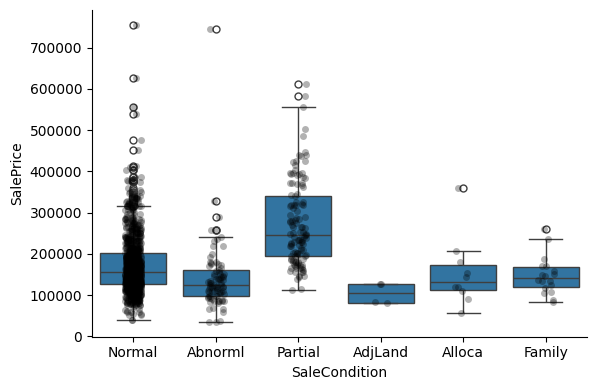

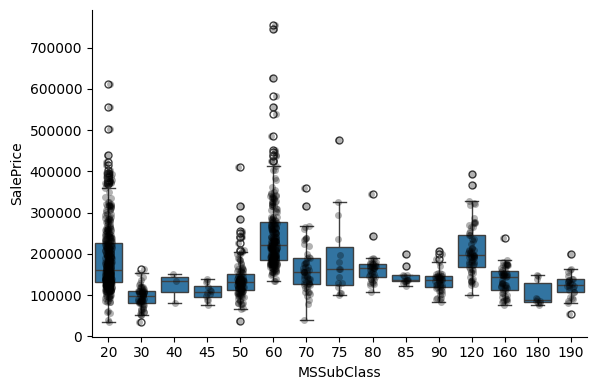

In [49]:
for var in cat_others:
    # make boxplot with catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)

    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')

    plt.show()